# Homework 4 _ Applied Machine Learning

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lalonde_df = pd.DataFrame.from_csv ('lalonde.csv')
Lalonde_df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


## Question 1 
### 1. a naive analysis 

The first naive thing one can thing of is to compare the earnings in 1978 for the two groups.

In [18]:
Diff_df=Lalonde_df.copy()

mean_earn_treat=Lalonde_df.loc[Diff_df.treat==1].re78.mean()
mean_earn_not=Lalonde_df.loc[Diff_df.treat==0].re78.mean()

print("The mean earnings in 78 for the treated population is " + str(round(mean_earn_treat,2)) +'. ',
      "The mean earnings in 78 for the population not treated is " + str(round(mean_earn_not,2)) + '.')

The mean earnings in 78 for the treated population is 6349.14.  The mean earnings in 78 for the population not treated is 6984.17.


From this, we would conclude that the treatment is not efficient. To be a bit less naive, let us try to calculate and compare the mean of the difference between the earnings after (78) and before (75) the treatment for the two groups. 

In [19]:
#Calculate the mean of the difference in earning between 78 and 75

Diff_df=Lalonde_df.copy()
Diff_df['difference_78_75']= Diff_df.re78-Diff_df.re75
mean_diff_treat=Diff_df.loc[Diff_df.treat==1].difference_78_75.mean()
mean_diff_not=Diff_df.loc[Diff_df.treat==0].difference_78_75.mean()


print("The mean difference in the earnings from 78 and 75 for the treated population is " + str(round(mean_diff_treat,2)) +'. ',
      "The mean difference in the earnings from 78 and 75 for the population not treated is " + str(round(mean_diff_not,2)) + '.')

The mean difference in the earnings from 78 and 75 for the treated population is 4817.09.  The mean difference in the earnings from 78 and 75 for the population not treated is 4517.69.


Now, one could conclude that the mean difference is higher for the treated population therefore the treatment was efficient. 
Let us try to draw the mean earnings for each year for the 2 groups to see if we can really notice a big difference between the difference in earnings before/after the treatment for the 2 groups. 

In [20]:
#create a table with the figures needed

df = pd.DataFrame({})
ind=0
for tr in [1,0] :
    for yr in [74,75,78]:
        year= 're'+str(yr)
        for lin in range(0,len(Lalonde_df.loc[Lalonde_df.treat==tr][year])):
            df.loc[ind, 'treat'] = tr
            df.loc[ind, 'year'] = '19'+ str(yr)
            df.loc[ind, 'earning'] = Lalonde_df.loc[Lalonde_df.treat==tr][year][lin]
            ind=ind+1
            
        

df.head()

,treat,year,earning
0,1.0,1974,0.0
1,1.0,1974,0.0
2,1.0,1974,0.0
3,1.0,1974,0.0
4,1.0,1974,0.0


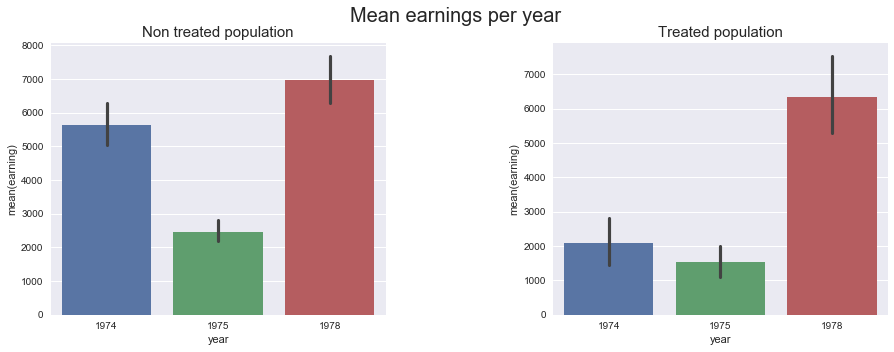

In [25]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,5), ncols=2, nrows=1)
plt.suptitle("Mean earnings per year", fontsize=20)


# Adjust the sub plots parameters
wspace =  0.5   # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)

# Set a title to each graph
ax[0].set_title("Non treated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)


# Plot the data
sns.barplot( df.loc[df.treat==0].year, df.loc[df.treat==0].earning, ax=ax[0])
sns.barplot( df.loc[df.treat==1].year, df.loc[df.treat==1].earning, ax=ax[1])

plt.show()

* This graph shows that for the treated population, the earnings after the treatment are way higher than before. For the non treated population, the difference is smaller. 
* However, this graph shows the mean of the earnings and we know that the mean is not robust and therefore is very sensitive to outliers. In our dataset, there are a lot of 0 in the earnings: that could be because the person really earned 0 for that year or maybe it is just missing data. Considering the high number of cases where the earnings are 0, we will consider that this is missing data and therefore we will now try to redraw this graph without the lines where earning is 0. 

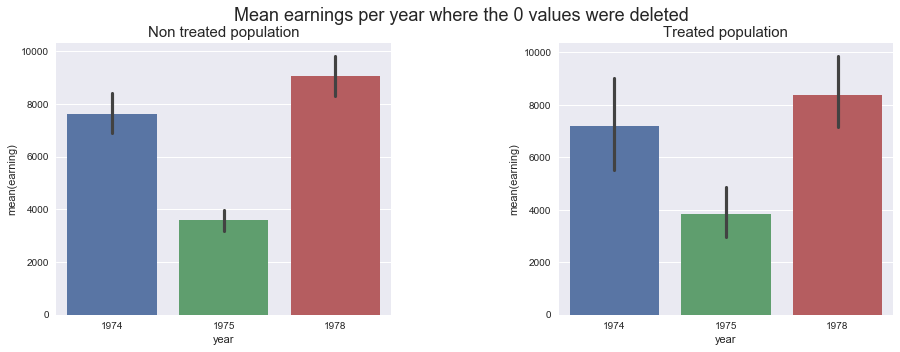

In [27]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,5), ncols=2, nrows=1)
plt.suptitle("Mean earnings per year where the 0 values were deleted", fontsize=18)


# Adjust the sub plots parameters
wspace =  0.5   # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph
ax[0].set_title("Non treated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)


# Plot the data
sns.barplot( df.loc[df.treat==0].loc[df.earning!=0].year, df.loc[df.treat==0].loc[df.earning!=0].earning, ax=ax[0])
sns.barplot( df.loc[df.treat==1].loc[df.earning!=0].year, df.loc[df.treat==1].loc[df.earning!=0].earning, ax= ax[1])

plt.show()

We notice that when we do not consider the values for which the earnings are 0, the results are very different. It is now more complicated to make any conclusion about the graph since both barcharts are now similar and the differences between the earnings in 78 and 75 and 74 seem to be the same for the two groups. This confirms how the mean is not robust since when we did not account for the outliers (namely 0), the means distribution completely changed. To avoid this, we can draw a boxplot instead of a barplot. 

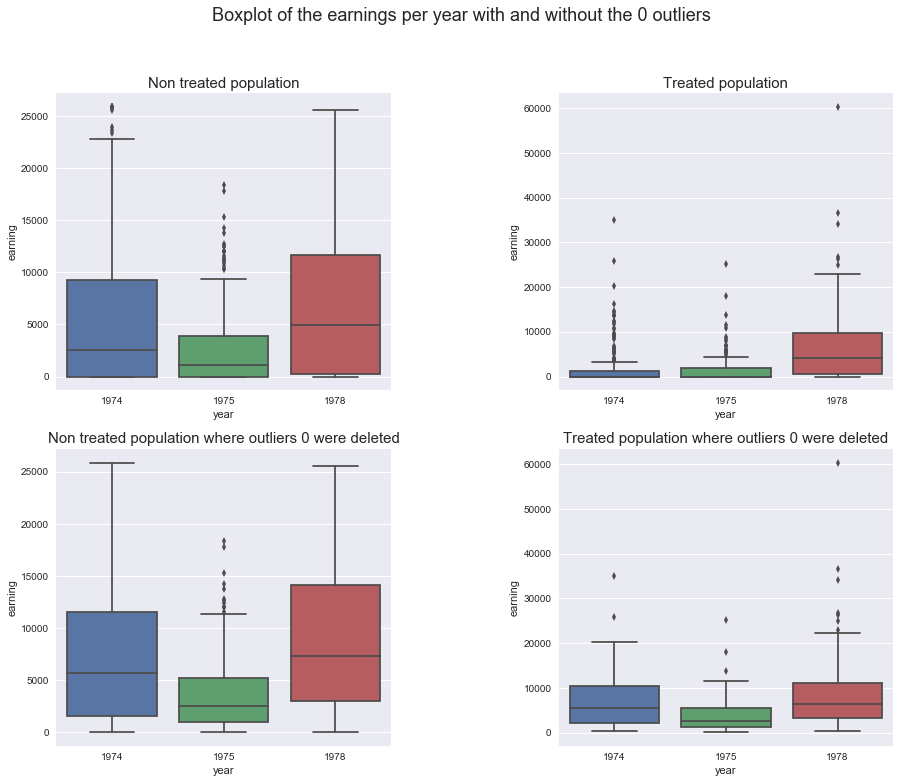

In [44]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,12), ncols=2, nrows=2)
plt.suptitle("Boxplot of the earnings per year with and without the 0 outliers", fontsize=18)


# Adjust the sub plots parameters
wspace =  0.5   # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph
ax[0][0].set_title("Non treated population", fontsize=15)
ax[0][1].set_title("Treated population", fontsize=15)
ax[1][0].set_title("Non treated population where outliers 0 were deleted", fontsize=15)
ax[1][1].set_title("Treated population where outliers 0 were deleted", fontsize=15)

# Plot the data

sns.boxplot( df.loc[df.treat==0].year, df.loc[df.treat==0].earning, ax=ax[0][0])
sns.boxplot( df.loc[df.treat==1].year, df.loc[df.treat==1].earning, ax= ax[0][1])
sns.boxplot( df.loc[df.treat==0].loc[df.earning!=0].year, df.loc[df.treat==0].loc[df.earning!=0].earning, ax=ax[1][0])
sns.boxplot( df.loc[df.treat==1].loc[df.earning!=0].year, df.loc[df.treat==1].loc[df.earning!=0].earning, ax= ax[1][1])

plt.show()

We see again that too many earnings equal 0 in 74 and 75 (median is almost 0 for the treated population!) so that might just be missing data and it would be better to look at the two last boxplots. However the outliers over 30000 in the treated population makes it very difficult to draw any conclusion about these graphs so we will also delete these points. 

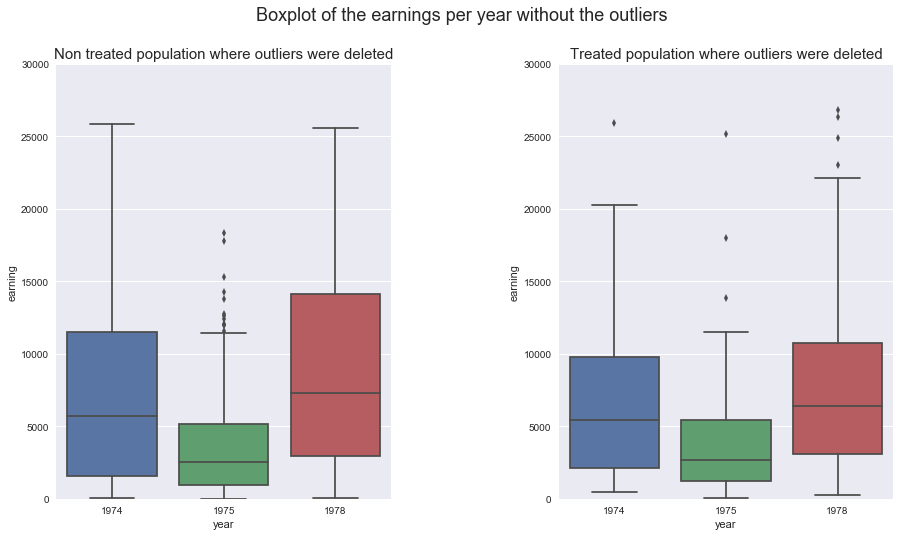

In [51]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,8), ncols=2, nrows=1)
plt.suptitle("Boxplot of the earnings per year without the outliers", fontsize=18)


# Adjust the sub plots parameters
wspace =  0.5   # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph

ax[0].set_title("Non treated population where outliers were deleted", fontsize=15)
ax[1].set_title("Treated population where outliers were deleted", fontsize=15)

# Plot the data

sns.boxplot( df.loc[df.treat==0].loc[df.earning!=0].year, df.loc[df.treat==0].loc[df.earning!=0].loc[df.earning<=30000].earning, ax=ax[0])
sns.boxplot( df.loc[df.treat==1].loc[df.earning!=0].year, df.loc[df.treat==1].loc[df.earning!=0].loc[df.earning<=30000].earning, ax= ax[1])
# Set the axis limits to be the same
ax[0].set(ylim=(0,30000))
ax[1].set(ylim=(0,30000))
plt.show()

- Again, it is very hard to draw any conclusion about this because the treated and non treated population have very similar boxplots. The treated population definitely has more outliers, but the 3 medians are very similar. 
- The boxes are a bit smaller for the treated population (for every year) which makes us wonder whether the treated and the untreated populations were similar before the treatment, ie. maybe the population chosen to be treated was a population whose earnings were smaller than for the untreated population. 

### 2. a closer look at the data

Let us first check what is the proportion of the population having a degree in both groups. 

In [54]:
Lalonde_df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [55]:
treat = Lalonde_df.loc[Lalonde_df.treat==1].treat.count()
not_tr = Lalonde_df.loc[Lalonde_df.treat==0].treat.count()
deg_treat = Lalonde_df.loc[Lalonde_df.treat==1].loc[Lalonde_df.nodegree==0].nodegree.count() 
deg_not = Lalonde_df.loc[Lalonde_df.treat==0].loc[Lalonde_df.nodegree==0].nodegree.count()

prop_deg_treat= deg_treat/treat
prop_deg_not = deg_not/not_tr

print ( str(round(prop_deg_not*100,2)) + '% of the untreated population earned a degree whereas only ' +  str(round(prop_deg_treat*100,2)) + '% of the treated population earned one.')

40.33% of the untreated population earned a degree whereas only 29.19% of the treated population earned one.


More people from the untreated population earned a degree from school so that could influence the final results of the study as they might be more likely to have higher earnings. 
Let us now have a look at the age distribution.

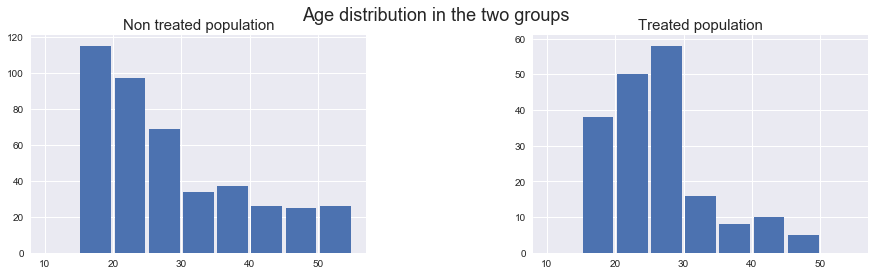

In [57]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("Age distribution in the two groups", fontsize=18)


# Adjust the sub plots parameters
wspace =  0.5 # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph

ax[0].set_title("Non treated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)

Lalonde_df.loc[Lalonde_df.treat==0].age.hist(bins=list(range(10,60,5)), rwidth=0.9, ax=ax[0])
Lalonde_df.loc[Lalonde_df.treat==1].age.hist(bins=list(range(10,60,5)), rwidth=0.9, ax=ax[1])

plt.show()

There seems to be more young people and less 35 to 60 years old people in the treated population, which could also influence the earnings: if one of the two groups is less experienced, it is more likely that this population will earn less money and have a lower increase in their wage from one year to another. Let us now have a look at the number of years of education distribution.

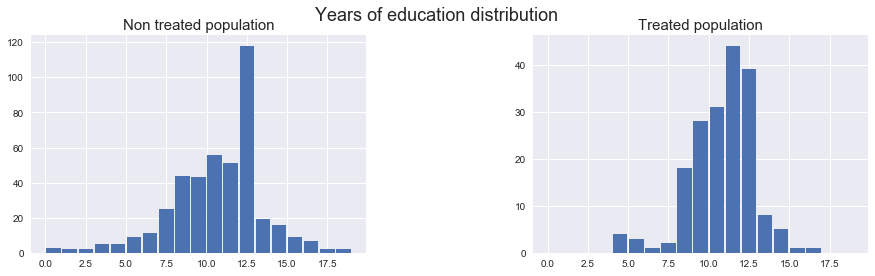

In [58]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("Years of education distribution", fontsize=18)
fig.xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

# Adjust the sub plots parameters
wspace =  0.5 # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph

ax[0].set_title("Non treated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)

Lalonde_df.loc[Lalonde_df.treat==0].educ.hist(bins=list(range(0,20,1)), rwidth=0.9, ax=ax[0])
Lalonde_df.loc[Lalonde_df.treat==1].educ.hist(bins=list(range(0,20,1)), rwidth=0.9, ax=ax[1])

plt.show()

Here, we can see that, again, the two distributions are very different and that can impact the results of the study: the more year of education you have, the higher your wage. 

#### To conclude on these two first analyses, one can say that, in order to be able to draw any conclusion, it is crucial to match people (treated and control) that have (at least) similar features. This is what propensity score is about: matching people who have same propensity score (ie. their features have same distribution). 

### 3. A propensity score model

In [127]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
import numpy as np

# X = training vector of shape (number of samples, number of features)
# Y = Target vector relative to X with shape (number of samples) 
X=Lalonde_df.copy()

# Add 'white' as binary variable, with value 1 if 'black' and 'hispan' are both 0
# (It was specified in the assignment that we only have black, hispanic or white 
# people, otherwise this would be named 'non-black-non-hispanic' or similar)
X['white'] = np.where((X['black'] == 0) & (X['hispan'] == 0), 1, 0)

# Propensity score must be based on the pre treatment features
del X['treat']
del X['re78']
y=Lalonde_df.treat

logistic.fit(X,y)

pred = logistic.predict_proba(X)



# Take the first element of each propensity score, since they sum to 1
X['prop_score'] = pred[:,0]

X.head()

,age,educ,black,hispan,married,nodegree,re74,re75,white,prop_score
id,,,,,,,,,,
NSW1,37,11,1,0,1,1,0.0,0.0,0,0.487237
NSW2,22,9,0,1,0,1,0.0,0.0,0,0.706139
NSW3,30,12,1,0,0,0,0.0,0.0,0,0.351450
NSW4,27,11,1,0,0,1,0.0,0.0,0,0.332523
NSW5,33,8,1,0,0,1,0.0,0.0,0,0.336496


## Applied ML

In [141]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [65]:
remove = ('headers', 'footers', 'quotes')

In [66]:
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=12)

In [67]:
len(dataset.data)

18846

In [68]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
vectorized_dataset = vectorizer.fit_transform(dataset.data)

In [74]:
vectorized_dataset.shape

(18846, 173446)

In [75]:
x_train, x_rest, y_train, y_rest = train_test_split(vectorized_dataset, dataset.target, test_size = 0.2)
print(x_train.shape, x_rest.shape, y_train.shape, y_rest.shape)

(15076, 173446) (3770, 173446) (15076,) (3770,)


In [76]:
x_validation, x_test, y_validation, y_test = train_test_split(x_rest, y_rest, test_size = 0.5)

In [126]:
def grid_search_rf(start_depth, end_depth, step_depth, min_estimators, max_estimators, step_estimators):
    results = dict()
    iters = (int((end_depth - start_depth)/step_depth) + 1) * (int((max_estimators - min_estimators)/step_estimators) + 1)
    ind = 0
    for depth in range(start_depth, end_depth+1, step_depth):
        for n_estimator in range(min_estimators, max_estimators+1, step_estimators):
            random_forest = RandomForestClassifier(max_depth=depth, n_estimators=n_estimator, random_state=0)

            random_forest.fit(x_train, y_train)
            pred = random_forest.predict(x_validation)
            score = metrics.accuracy_score(y_validation, pred)
            results[ind] = {'max_depth' : depth, 'n_estimators' : n_estimator, 'accuracy' : score}
            print("{0}/{1} iteration\t depth: {2}\t n_estimators: {3}\t accuracy: {4}"
                  .format(ind + 1, iters, depth, n_estimator, score))
            ind = ind + 1
    return pd.DataFrame.from_dict(results, orient='index')

In [127]:
results = grid_search_rf(1, 30, 3, 100, 2000, 400)

1/50 iteration	 depth: 1	 n_estimators: 100	 accuracy: 0.33421750663129973
2/50 iteration	 depth: 1	 n_estimators: 500	 accuracy: 0.5061007957559682
3/50 iteration	 depth: 1	 n_estimators: 900	 accuracy: 0.5151193633952255
4/50 iteration	 depth: 1	 n_estimators: 1300	 accuracy: 0.5151193633952255
5/50 iteration	 depth: 1	 n_estimators: 1700	 accuracy: 0.5119363395225465
6/50 iteration	 depth: 4	 n_estimators: 100	 accuracy: 0.5745358090185676
7/50 iteration	 depth: 4	 n_estimators: 500	 accuracy: 0.6912466843501326
8/50 iteration	 depth: 4	 n_estimators: 900	 accuracy: 0.6960212201591512
9/50 iteration	 depth: 4	 n_estimators: 1300	 accuracy: 0.7082228116710876
10/50 iteration	 depth: 4	 n_estimators: 1700	 accuracy: 0.709814323607427
11/50 iteration	 depth: 7	 n_estimators: 100	 accuracy: 0.6663129973474801
12/50 iteration	 depth: 7	 n_estimators: 500	 accuracy: 0.753315649867374
13/50 iteration	 depth: 7	 n_estimators: 900	 accuracy: 0.753315649867374
14/50 iteration	 depth: 7	 n_est

In [122]:
results_df

,max_depth,n_estimators,accuracy
0,2,100,0.481167
1,2,300,0.580902
2,2,500,0.619629
3,2,700,0.623342
4,2,900,0.623873
5,2,1100,0.628117
6,2,1300,0.635013
7,2,1500,0.635544
8,2,1700,0.634483
9,2,1900,0.637135


<a list of 35 text.Text objects>

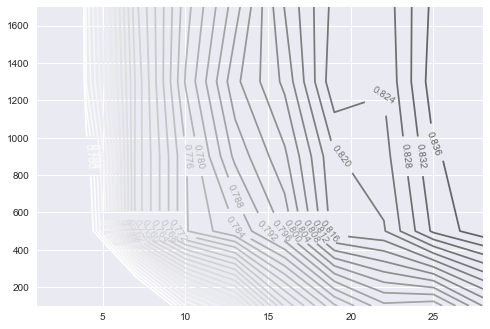

In [136]:
plt.figure()
cs = plt.contour(results.max_depth.values.reshape(10, 5), results.n_estimators.values.reshape(10, 5),
            results.accuracy.values.reshape(10, 5), np.linspace(0.7, 0.9, 51))
plt.clabel(cs, inline=1, fontsize=10)

In [154]:
random_forest = RandomForestClassifier(max_depth=35, n_estimators=1700, random_state=0)

random_forest.fit(x_train, y_train)
val_pred = random_forest.predict(x_validation)
val_score = metrics.accuracy_score(y_validation, val_pred)
test_pred = random_forest.predict(x_test)
test_score = metrics.accuracy_score(y_test, test_pred)
print('Validation score: {0}\t test score: {1}'.format(val_score, test_score))

Validation score: 0.849867374005305	 test score: 0.830238726790451


In [155]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


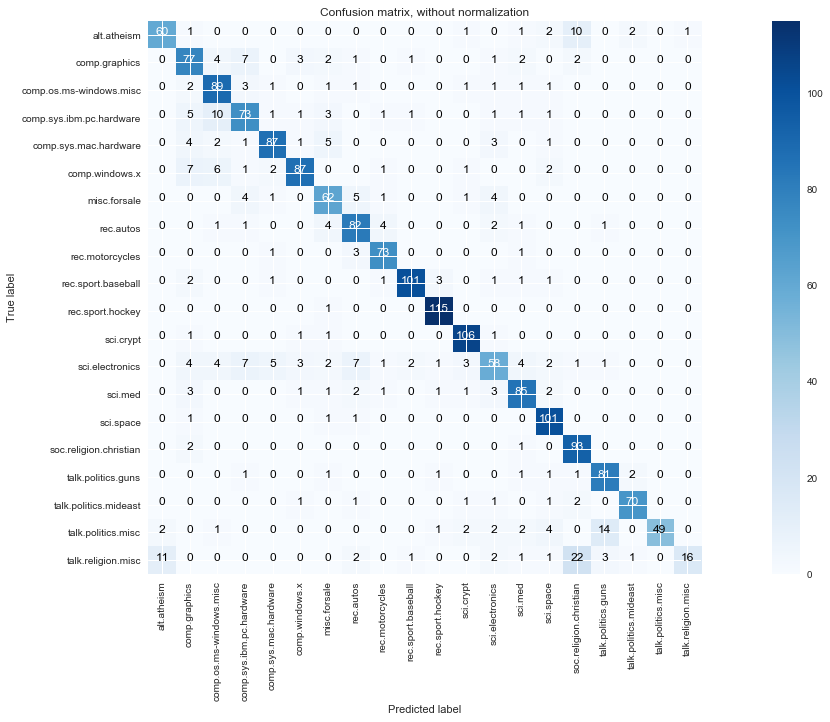

In [156]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, classes=dataset.target_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [157]:
random_forest.feature_importances_

array([  4.34e-04,   1.98e-04,   1.39e-06, ...,   0.00e+00,   0.00e+00,
         9.23e-09])

In [159]:
indicies_feature = np.argsort(random_forest.feature_importances_)

array([ 86722,  67120,  67119, ...,  55427,  65617, 139364])

In [194]:
top20 = indicies_feature[-1:-21:-1]
labels = np.array(vectorizer.get_feature_names())[top20]
values = random_forest.feature_importances_[top20]

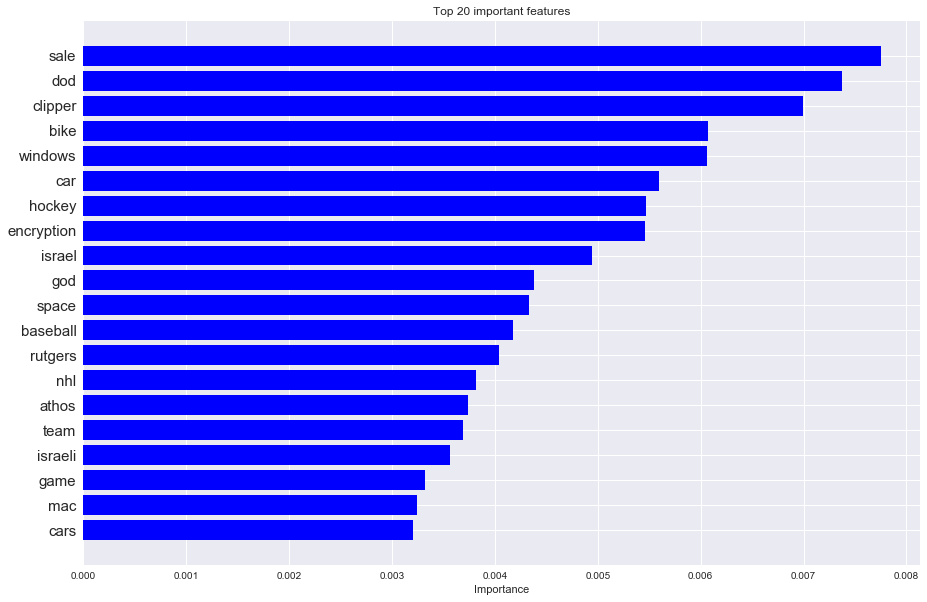

In [203]:
fig, ax = plt.subplots(figsize=(15,10))

y_pos = np.arange(len(labels))

ax.barh(y_pos, values, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, size = 15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Top 20 important features')

plt.show()
